<a href="https://colab.research.google.com/github/chotika-b/dadshomework/blob/master/DADS7202_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Body signal of smoking 🚬 

dataset = https://www.kaggle.com/datasets/kukuroo3/body-signal-of-smoking

# Introduction

Smoking has been proven to negatively affect health and complex behavior. This project is binary classification task, classify the presence or absence of smoking through bio-signals.


>target variable:  
>NO smoking = 0, YES smoking = 1

**content**
1. [Environment Setup](#t1.)
2. [Data Preparation](#t2.)
3. [Data exploration after cleaning data](#t3.)
4. [Correlation & feature selection](#t4.)
5. [Tradition ML](#t5.)
6. [MLP](#t6.)
7. [Result](#t7.)
8. [Discussion](#t8.)
9. [Conclusion](#t9.)

<a id="t1."></a>

# 1. Environment Setup

**1.1 Import Libraries**

In [ ]:
# data preparation
import pandas as pd
import numpy as np
import random as rnd
import datetime
import sklearn
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_score,f1_score, mean_squared_error,r2_score,recall_score,roc_auc_score,roc_curve
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,KFold
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import copy

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# ML
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, Perceptron, LogisticRegressionCV, PassiveAggressiveClassifier, RidgeClassifierCV, SGDClassifier, Perceptron
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC, NuSVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier

# MLP
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import Input
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint

# dealing with imbalanced data (undersampling, over sampling) <https://imbalanced-learn.org/stable/>
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
warnings.filterwarnings("ignore",category=FutureWarning)

# Set fixed seeding values for reproducability during experiments
# Skip this cell if random initialization (with varied results) is needed
np.random.seed(1234)
tf.random.set_seed(5678)

**1.2 Version & Device**

In [ ]:
# libraries version
import sys
print('[libraries version]')
print( f"Python     version: {sys.version.split(' ')[0]}" )
print( f"NumPy      version: {np.__version__}" )
print( f"TensorFlow version: {tf.__version__}\n" )

# device
print('[device]')
gpus = tf.config.list_physical_devices('GPU')
cpus = tf.config.list_physical_devices('CPU')
print( f"TensorFlow detected { len(gpus) } GPU(s):" )
for i, gpu in enumerate(gpus):
  print( f".... GPU No. {i}: Name = {gpu.name} , Type = {gpu.device_type}" )
print( f"TensorFlow detected { len(cpus) } cpu(s):" )
for i, cpu in enumerate(cpus):
  print( f".... CPU No. {i}: Name = {cpu.name} , Type = {cpu.device_type}" )

[libraries version]
Python     version: 3.7.13
NumPy      version: 1.21.6
TensorFlow version: 2.8.2

[device]
TensorFlow detected 0 GPU(s):
TensorFlow detected 1 cpu(s):
.... CPU No. 0: Name = /physical_device:CPU:0 , Type = CPU


In [ ]:
# List all NVIDIA GPUs as avaialble in this computer (or Colab's session)
!nvidia-smi -L

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



<a id="t2."></a>

# 2. Data Preparation
- 2.1 Loading Dataset
- 2.2 Variables Description
- 2.3 Descriptive Statistics
- 2.4 Basic Information About Dataset
- 2.5 Convert data type to number

**2.1 Loading Dataset**

The Python Pandas packages helps us work with our datasets. We start by acquiring the training and testing datasets into Pandas DataFrames. We also combine these datasets to run certain operations on both datasets together.

In [ ]:
# dataset from <https://www.kaggle.com/datasets/kukuroo3/body-signal-of-smoking>
url = 'https://github.com/chotika-b/dadshomework/blob/master/smoking.csv?raw=true'
df1 = pd.read_csv(url, sep=",")

In [ ]:
# preview the data
df1.head(n = 10).style.background_gradient(cmap = "Oranges")

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,F,40,155,60,81.300000,1.200000,1.000000,1.000000,1.000000,114.000000,73.000000,94.000000,215.000000,82.000000,73.000000,126.000000,12.900000,1.000000,0.700000,18.000000,19.000000,27.000000,Y,0,Y,0
1,1,F,40,160,60,81.000000,0.800000,0.600000,1.000000,1.000000,119.000000,70.000000,130.000000,192.000000,115.000000,42.000000,127.000000,12.700000,1.000000,0.600000,22.000000,19.000000,18.000000,Y,0,Y,0
2,2,M,55,170,60,80.000000,0.800000,0.800000,1.000000,1.000000,138.000000,86.000000,89.000000,242.000000,182.000000,55.000000,151.000000,15.800000,1.000000,1.000000,21.000000,16.000000,22.000000,Y,0,N,1
3,3,M,40,165,70,88.000000,1.500000,1.500000,1.000000,1.000000,100.000000,60.000000,96.000000,322.000000,254.000000,45.000000,226.000000,14.700000,1.000000,1.000000,19.000000,26.000000,18.000000,Y,0,Y,0
4,4,F,40,155,60,86.000000,1.000000,1.000000,1.000000,1.000000,120.000000,74.000000,80.000000,184.000000,74.000000,62.000000,107.000000,12.500000,1.000000,0.600000,16.000000,14.000000,22.000000,Y,0,N,0
5,5,M,30,180,75,85.000000,1.200000,1.200000,1.000000,1.000000,128.000000,76.000000,95.000000,217.000000,199.000000,48.000000,129.000000,16.200000,1.000000,1.200000,18.000000,27.000000,33.000000,Y,0,Y,0
6,6,M,40,160,60,85.500000,1.000000,1.000000,1.000000,1.000000,116.000000,82.000000,94.000000,226.000000,68.000000,55.000000,157.000000,17.000000,1.000000,0.700000,21.000000,27.000000,39.000000,Y,1,Y,1
7,7,M,45,165,90,96.000000,1.200000,1.000000,1.000000,1.000000,153.000000,96.000000,158.000000,222.000000,269.000000,34.000000,134.000000,15.000000,1.000000,1.300000,38.000000,71.000000,111.000000,Y,0,Y,0
8,9,F,50,150,60,85.000000,0.700000,0.800000,1.000000,1.000000,115.000000,74.000000,86.000000,210.000000,66.000000,48.000000,149.000000,13.700000,1.000000,0.800000,31.000000,31.000000,14.000000,Y,0,N,0
9,10,M,45,175,75,89.000000,1.000000,1.000000,1.000000,1.000000,113.000000,64.000000,94.000000,198.000000,147.000000,43.000000,126.000000,16.000000,1.000000,0.800000,26.000000,24.000000,63.000000,Y,0,N,0


In [ ]:
# Shape
print('Data sizing:')
print(f'number of rows    = {df1.shape[0]}')
print(f'number of columns = {df1.shape[1]}')

Data sizing:
number of rows    = 55692
number of columns = 27


**2.2 Variables Description**

Noting the feature names for directly manipulating or analyzing these. These feature names are described on the [Data set](https://www.kaggle.com/datasets/kukuroo3/body-signal-of-smoking).

In [ ]:
print('number of variables:',df1.shape[1])
for i in df1.columns:
  print(i,end=', ')

number of variables: 27
ID, gender, age, height(cm), weight(kg), waist(cm), eyesight(left), eyesight(right), hearing(left), hearing(right), systolic, relaxation, fasting blood sugar, Cholesterol, triglyceride, HDL, LDL, hemoglobin, Urine protein, serum creatinine, AST, ALT, Gtp, oral, dental caries, tartar, smoking, 

**Variables**

1. 'ID' is index for each record.<br>
2. 'gender'<br>
3. 'age' <br>
4. 'height(cm)' <br> 
5. 'weight(kg)' <br> 
6. 'waist(cm)' - is the waist circumference of each person in the data.<br>
7. 'eyesight(left)' - is the measurement of left eyesight vision.<br> 
8. 'eyesight(right)' - is the measurement of right eyesight vision. <br> 
9. 'hearing(left)' -  is identify that this subject has impaired left ear hearing or not. <br> 
10. 'hearing(right)' - is identify thatthis subject has impaired right ear hearing or not. <br>
11. 'systolic' - is Systolic Blood Pressur. Normal range is between 90-140 mmHg. <br> 
12. 'relaxation' - is Diastolic Blood Pressure. Normal range is between 60-90 mmHg.<br> 
13. 'fasting blood sugar' - is test of sugar in the blood sample which will be taken after subject haven't eaten anything the night before (fast). The benchmark value is less than 100 mg/dL.<br> 
14. 'Cholesterol' - is the measurement of total cholesterol. Normal range is Less than 200 mg/dL. Borderline high: 200 to 239 mg/dL. High: At or above 240 mg/dL <br>
15. 'triglyceride' is a type of fat (lipid) found in blood.<br>
16. 'HDL' is the amount of high-density lipoprotein which is good fat in blood sample. The optimal value for men more than 40, for women is more than 50.<br> 
17. 'LDL' is the amount of high-density lipoprotein which is good fat in blood sample. The optimal value is less than 100.<br> 
18. 'hemoglobin' is amount of a protein in red blood cells that carries oxygen in blood sample. <br> 
19. 'Urine protein' - is amount of protein in urine. The normal value is 1.00. <br>
20. 'serum creatinine' - A creatinine test is a measure of how well kidneys are performing their job of filtering waste from  blood. <br> 
21. 'AST' is the measurement of the amount of AST in your blood. The test is commonly used to help diagnose liver damage or disease. <br> 
22. 'ALT' - ALT is an enzyme found in the liver that helps convert proteins into energy for the liver cells. When the liver is damaged, ALT is released into the bloodstream and levels increase. <br> 
23. 'Gtp' - (Gamma GT) When the liver is damaged, GGT may leak into the bloodstream. High levels of GGT in the blood may be a sign of liver disease.<br> 
24. 'oral' - is oral Examination status. <br> 
25. 'dental caries' - is identify that this subject had a dental decay or not.  <br> 
26. 'tartar' - is identify that this subject had a tartar on teeth or not. <br>
27. 'smoking' - is identify that this subject is smoking or not.

**2.3 Descriptive Statistics**

In [ ]:
#describe
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,55692.0,27845.500000,16077.039933,0.0,13922.75,27845.5,41768.25,55691.0
age,55692.0,44.182917,12.071418,20.0,40.00,40.0,55.00,85.0
height(cm),55692.0,164.649321,9.194597,130.0,160.00,165.0,170.00,190.0
weight(kg),55692.0,65.864936,12.820306,30.0,55.00,65.0,75.00,135.0
waist(cm),55692.0,82.046418,9.274223,51.0,76.00,82.0,88.00,129.0
eyesight(left),55692.0,1.012623,0.486873,0.1,0.80,1.0,1.20,9.9
eyesight(right),55692.0,1.007443,0.485964,0.1,0.80,1.0,1.20,9.9
hearing(left),55692.0,1.025587,0.157902,1.0,1.00,1.0,1.00,2.0
hearing(right),55692.0,1.026144,0.159564,1.0,1.00,1.0,1.00,2.0
systolic,55692.0,121.494218,13.675989,71.0,112.00,120.0,130.00,240.0


**2.4 Basic Information About Dataset**

In [ ]:
display(df1.info())
print('------------------------------------------------')
print('number of columns that contain null', len([col for col in df1.columns if df1[col].isna().any()]))
print('number of numeric columns    : ',len(df1.dtypes[df1.dtypes!='object'].index.to_list()))
print('number of categorical columns: ',len(df1.dtypes[df1.dtypes=='object'].index.to_list()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   55692 non-null  int64  
 1   gender               55692 non-null  object 
 2   age                  55692 non-null  int64  
 3   height(cm)           55692 non-null  int64  
 4   weight(kg)           55692 non-null  int64  
 5   waist(cm)            55692 non-null  float64
 6   eyesight(left)       55692 non-null  float64
 7   eyesight(right)      55692 non-null  float64
 8   hearing(left)        55692 non-null  float64
 9   hearing(right)       55692 non-null  float64
 10  systolic             55692 non-null  float64
 11  relaxation           55692 non-null  float64
 12  fasting blood sugar  55692 non-null  float64
 13  Cholesterol          55692 non-null  float64
 14  triglyceride         55692 non-null  float64
 15  HDL                  55692 non-null 

None

------------------------------------------------
number of columns that contain null 0
number of numeric columns    :  24
number of categorical columns:  3


**2.5 Convert data type to number**

Input data type for MLP and traditional ML must be number, so we convert categorical columns to numerical columns with preprocessing.LabelEncoder() library

In [ ]:
categorical_column = df1.dtypes[df1.dtypes=='object'].index.to_list()
print('categorical columns:')
for i in categorical_column:
  print(f'{i:>7} varibles: {df1[i].unique()}')
display(df1[categorical_column].head())

print('\n\nencoding overview:')
for i in categorical_column:
  df1[i] = preprocessing.LabelEncoder().fit_transform(df1[i])
  print(f'{i:>7} varibles: {df1[i].unique()}')
display(df1[categorical_column].head())

categorical columns:
 gender varibles: ['F' 'M']
   oral varibles: ['Y']
 tartar varibles: ['Y' 'N']


,gender,oral,tartar
0,F,Y,Y
1,F,Y,Y
2,M,Y,N
3,M,Y,Y
4,F,Y,N




encoding overview:
 gender varibles: [0 1]
   oral varibles: [0]
 tartar varibles: [1 0]


,gender,oral,tartar
0,0,0,1
1,0,0,1
2,1,0,0
3,1,0,1
4,0,0,0


<a id="t3."></a>

# 3. Exploration Data after cleaning
- 3.1 Overall category each attributes
- 3.2 Box Plot

3.1 Overall category each attributes 




Categorize features into 2 types: Quantitative and Qualitative. <br>
Qualitative features are 5 features, namely gender, hearing(left), hearing(right), dental caries, and tartar. <br>
Quantitative features are the rest 20 features. <br>
Remark: Smoking is target variable and ID is not be used in model. 

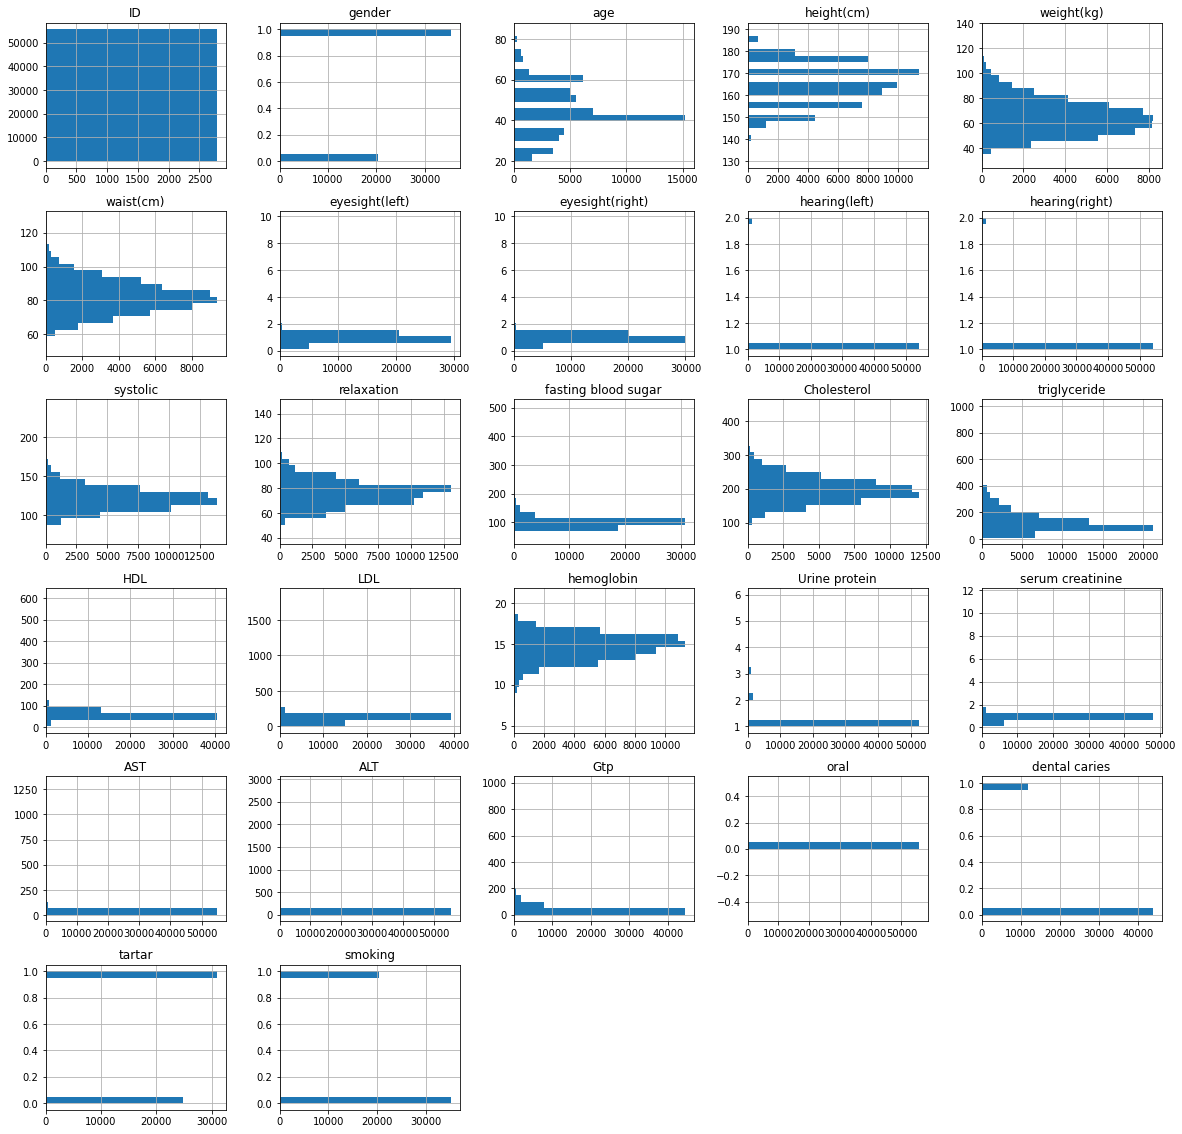

In [ ]:
df1.hist(figsize = (20, 20), bins = 20, orientation='horizontal');

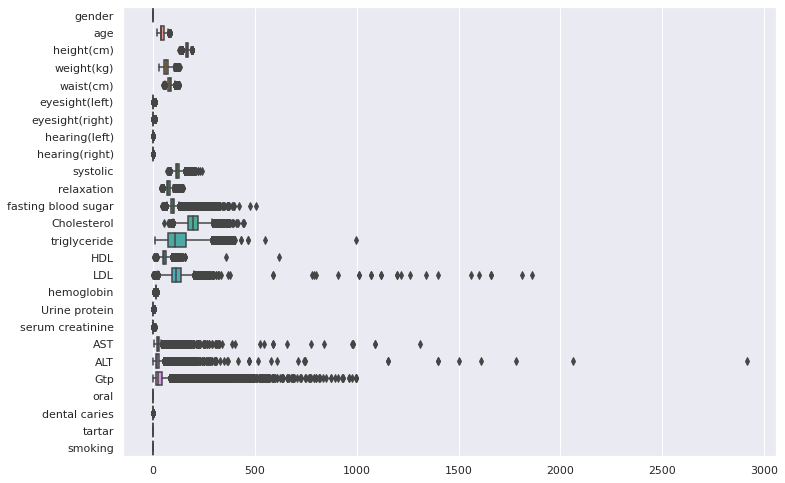

In [ ]:
#Set size for plotting 
sns.set(rc={'figure.figsize':(11.7,8.27)})

df2 = df1.drop(['ID'], axis = 1)
sns.boxplot(data = df2, orient = 'h')

As you can see from the boxplot of features, There are multiple features that has outstanding outlier such as triglyceride, HDL, LDL, AST, ALT and Gtp. 

#4. Corretion and Feature Selection
- 4.1 Correlation
- 4.2 Feature Selection by using feature importances
- 4.3 Data splitting and test the result between using all features ( except ID ) and feature importances selection.



### 4.1 Correlation

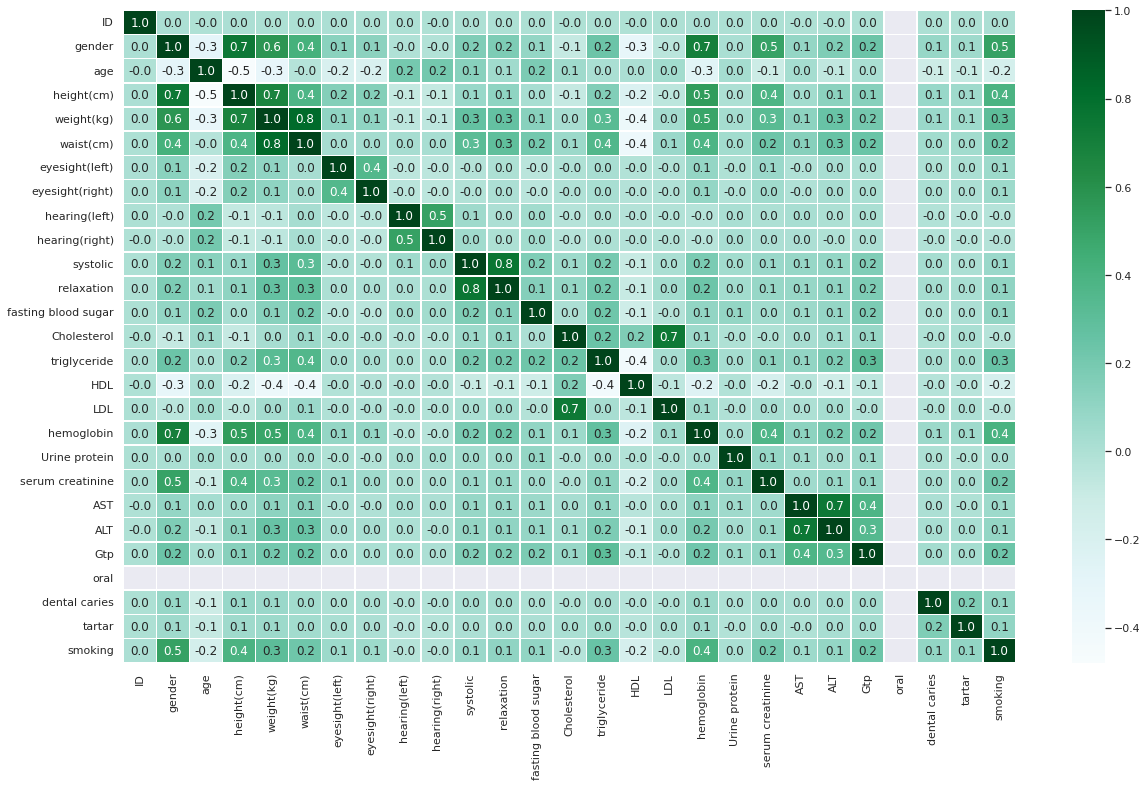

In [ ]:
# correlation heatmap effect ต่อค่า y => เลือกตัวแปร

f,ax = plt.subplots(figsize=(20, 12))
sns.heatmap(df1.corr(),cmap='BuGn', annot=True, linewidths=.5, fmt= '.1f',ax=ax)

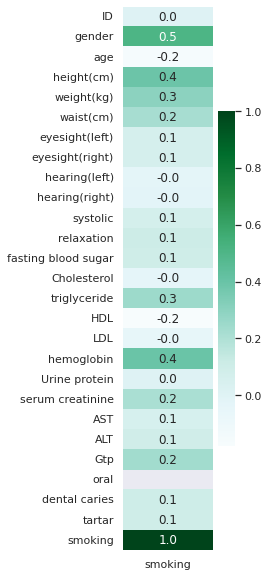

In [ ]:
# Heat map of smoking
corr = df1.corr()
x = corr[['smoking']]
arr = df1.values
f,ax = plt.subplots(figsize=(2, 10))
sns.heatmap(x,cmap='BuGn',annot=True, fmt= '.1f')



- From the correlation map, we can see that gender, height, hemogobin, weight and triglyceride greatly affect to the smoking.
- Because Pearson correlations only capture linear relationships between the inputs and target variables that mean it might not work with the categorical output. So we decided to use Feature importances to actually identify which features are most influential.

###4.2 Feature Selection by using Feature Importances


In [ ]:
## Create the model

#model= DecisionTreeClassifier(random_state=7)
model= RandomForestClassifier(n_estimators=250, random_state=7)
#model= ExtraTreesClassifier(n_estimators=250, random_state=7)
X=df1[[ 'gender', 'age', 'height(cm)', 'weight(kg)', 'waist(cm)',
       'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)',
       'systolic', 'relaxation', 'fasting blood sugar', 'Cholesterol',
       'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'Urine protein',
       'serum creatinine', 'AST', 'ALT', 'Gtp', 'oral', 'dental caries',
       'tartar']]
y=df1['smoking']
model.fit(X,y)

RandomForestClassifier(n_estimators=250, random_state=7)

In [ ]:
fi=pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=True)
fs=pd.DataFrame({'feature': X.columns,'importance': list(model.feature_importances_)}).sort_values('importance', ascending=False) #รวมกันได้ 1
fs.head(15)

,feature,importance
0,gender,0.115660
16,hemoglobin,0.087249
21,Gtp,0.082028
2,height(cm),0.072798
13,triglyceride,0.063190
4,waist(cm),0.047497
15,LDL,0.046982
12,Cholesterol,0.046430
20,ALT,0.045830
14,HDL,0.045747


-  From the table shows the score of input features based on their importance to predict the output.

In [ ]:
X=df1[fi[fi > .03].index] #เลือก features ที่มีความสำคัญ ในที่นี้เอา features ที่มีค่ามากกว่า 0.03
X.head()

,serum creatinine,weight(kg),age,relaxation,AST,systolic,fasting blood sugar,HDL,ALT,Cholesterol,LDL,waist(cm),triglyceride,height(cm),Gtp,hemoglobin,gender
0,0.7,60,40,73.0,18.0,114.0,94.0,73.0,19.0,215.0,126.0,81.3,82.0,155,27.0,12.9,0
1,0.6,60,40,70.0,22.0,119.0,130.0,42.0,19.0,192.0,127.0,81.0,115.0,160,18.0,12.7,0
2,1.0,60,55,86.0,21.0,138.0,89.0,55.0,16.0,242.0,151.0,80.0,182.0,170,22.0,15.8,1
3,1.0,70,40,60.0,19.0,100.0,96.0,45.0,26.0,322.0,226.0,88.0,254.0,165,18.0,14.7,1
4,0.6,60,40,74.0,16.0,120.0,80.0,62.0,14.0,184.0,107.0,86.0,74.0,155,22.0,12.5,0


- We choose input features with more than 0.03 importances to predict the smoking.

### 4.3 Data splitting and test the result between using all features( except ID ) and feature importances selection.
#### 4.3.1 By using feature importance ( select score more than 0.03 )

In [ ]:
X=df1[fi[fi > .03].index]
y=df1['smoking']

In [ ]:
#split data
test_size=.3
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=test_size, 
                                                    stratify=y,
                                                    random_state=7)

In [ ]:
algo=[
    [KNeighborsClassifier(n_neighbors=5), 'KNeighborsClassifier'], 
    [LogisticRegression(solver='lbfgs'), 'LogisticRegression'], 
    #[Perceptron(), 'Perceptron'],
    [DecisionTreeClassifier(min_samples_split=10), 'DecisionTreeClassifier'],
    [GradientBoostingClassifier(), 'GradientBoostingClassifier'],
    [RandomForestClassifier(), 'RandomForestClassifier'],
    [BaggingClassifier(), 'BaggingClassifier'],
    [AdaBoostClassifier(), 'AdaBoostClassifier'],
    [GaussianNB(), 'GaussianNB']
    #[MLPClassifier(), 'MLPClassifier'],
    #[SVC(kernel='linear'), 'SVC_linear'], 
    #[GaussianProcessClassifier(), 'GaussianProcessClassifier']
]
model_scores=[]
for a in algo:
    model = a[0]
    model.fit(X_train, y_train)
    score=model.score(X_test, y_test)
    model_scores.append([ a[1],score])
    y_pred=model.predict(X_test)
    print(f'{a[1]:20} score: {score:.04f}')
    print(metrics.confusion_matrix(y_test, y_pred))
    print(metrics.classification_report(y_test, y_pred))
    print('-' * 100)

print(model_scores)
print(f'best score = {max(model_scores)}')  

KNeighborsClassifier score: 0.7107
[[8351 2220]
 [2613 3524]]
              precision    recall  f1-score   support

           0       0.76      0.79      0.78     10571
           1       0.61      0.57      0.59      6137

    accuracy                           0.71     16708
   macro avg       0.69      0.68      0.68     16708
weighted avg       0.71      0.71      0.71     16708

----------------------------------------------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression   score: 0.7169
[[8764 1807]
 [2923 3214]]
              precision    recall  f1-score   support

           0       0.75      0.83      0.79     10571
           1       0.64      0.52      0.58      6137

    accuracy                           0.72     16708
   macro avg       0.70      0.68      0.68     16708
weighted avg       0.71      0.72      0.71     16708

----------------------------------------------------------------------------------------------------
DecisionTreeClassifier score: 0.7580
[[8680 1891]
 [2153 3984]]
              precision    recall  f1-score   support

           0       0.80      0.82      0.81     10571
           1       0.68      0.65      0.66      6137

    accuracy                           0.76     16708
   macro avg       0.74      0.74      0.74     16708
weighted avg       0.76      0.76      0.76     16708

----------------------------------------------------------------------------------------------------
GradientBoostingCl

In [ ]:
#which model has the best accuracy. 
dscore=pd.DataFrame(model_scores, columns=['classifier','score'])
dscore.sort_values('score', ascending=False)

,classifier,score
4,RandomForestClassifier,0.819488
5,BaggingClassifier,0.799856
3,GradientBoostingClassifier,0.760713
6,AdaBoostClassifier,0.758439
2,DecisionTreeClassifier,0.757960
1,LogisticRegression,0.716902
0,KNeighborsClassifier,0.710737
7,GaussianNB,0.705231


Random Forest Classification has the best score through Feature Importances ( more than 0.03 )

####4.3.2 Using all features ( except ID )

In [ ]:
X= df1.drop(['smoking','ID'], axis = 1)
y=df1['smoking']

In [ ]:
#split data
test_size=.3
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=test_size, 
                                                    stratify=y,
                                                    random_state=7)

In [ ]:
algo=[
    [KNeighborsClassifier(n_neighbors=5), 'KNeighborsClassifier'], 
    [LogisticRegression(solver='lbfgs'), 'LogisticRegression'], 
    #[Perceptron(), 'Perceptron'],
    [DecisionTreeClassifier(min_samples_split=10), 'DecisionTreeClassifier'],
    [GradientBoostingClassifier(), 'GradientBoostingClassifier'],
    [RandomForestClassifier(), 'RandomForestClassifier'],
    [BaggingClassifier(), 'BaggingClassifier'],
    [AdaBoostClassifier(), 'AdaBoostClassifier'],
    [GaussianNB(), 'GaussianNB']
    #[MLPClassifier(), 'MLPClassifier'],
    #[SVC(kernel='linear'), 'SVC_linear'], 
    #[GaussianProcessClassifier(), 'GaussianProcessClassifier']
]
model_scores=[]
for a in algo:
    model = a[0]
    model.fit(X_train, y_train)
    score=model.score(X_test, y_test)
    model_scores.append([ a[1],score])
    y_pred=model.predict(X_test)
    print(f'{a[1]:20} score: {score:.04f}')
    print(metrics.confusion_matrix(y_test, y_pred))
    print(metrics.classification_report(y_test, y_pred))
    print('-' * 100)

print(model_scores)
print(f'best score = {max(model_scores)}')  

KNeighborsClassifier score: 0.7104
[[8342 2229]
 [2609 3528]]
              precision    recall  f1-score   support

           0       0.76      0.79      0.78     10571
           1       0.61      0.57      0.59      6137

    accuracy                           0.71     16708
   macro avg       0.69      0.68      0.68     16708
weighted avg       0.71      0.71      0.71     16708

----------------------------------------------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression   score: 0.7182
[[8755 1816]
 [2892 3245]]
              precision    recall  f1-score   support

           0       0.75      0.83      0.79     10571
           1       0.64      0.53      0.58      6137

    accuracy                           0.72     16708
   macro avg       0.70      0.68      0.68     16708
weighted avg       0.71      0.72      0.71     16708

----------------------------------------------------------------------------------------------------
DecisionTreeClassifier score: 0.7629
[[8704 1867]
 [2095 4042]]
              precision    recall  f1-score   support

           0       0.81      0.82      0.81     10571
           1       0.68      0.66      0.67      6137

    accuracy                           0.76     16708
   macro avg       0.75      0.74      0.74     16708
weighted avg       0.76      0.76      0.76     16708

----------------------------------------------------------------------------------------------------
GradientBoostingCl

In [ ]:
# which model has the best accuracy. 
dscore2=pd.DataFrame(model_scores, columns=['classifier','score'])
dscore2.sort_values('score', ascending=False)

,classifier,score
4,RandomForestClassifier,0.820924
5,BaggingClassifier,0.797223
3,GradientBoostingClassifier,0.763945
2,DecisionTreeClassifier,0.762868
6,AdaBoostClassifier,0.757661
1,LogisticRegression,0.718219
0,KNeighborsClassifier,0.710438
7,GaussianNB,0.709899


Random Forest Classification has the best score.

#### 4.3.3 Result : Compare the best accuracy between using feature importance and using all features (except ID)


In [ ]:
# using feature importance
dscore.sort_values('score', ascending=False)

,classifier,score
4,RandomForestClassifier,0.819488
5,BaggingClassifier,0.799856
3,GradientBoostingClassifier,0.760713
6,AdaBoostClassifier,0.758439
2,DecisionTreeClassifier,0.757960
1,LogisticRegression,0.716902
0,KNeighborsClassifier,0.710737
7,GaussianNB,0.705231


In [ ]:
# using all features ( except ID )
dscore2.sort_values('score', ascending=False)

,classifier,score
4,RandomForestClassifier,0.820924
5,BaggingClassifier,0.797223
3,GradientBoostingClassifier,0.763945
2,DecisionTreeClassifier,0.762868
6,AdaBoostClassifier,0.757661
1,LogisticRegression,0.718219
0,KNeighborsClassifier,0.710438
7,GaussianNB,0.709899


Using all features ( except ID ) give the best score. So we decided to use all feature(except ID) to create the model.

#5. Tradition ML
- 5.1 Split the Dataset into Train and Test Sets
- 5.2 Verfiy imbalanced
- 5.3 Random Under-Sampling
- 5.4 Equally Distributing and Correlating
- 5.5 Machine Learning Classification Algorithms
- 5.5.1 Non-under sampling data
- 5.5.2 Under sampling data



5.1 Split the Dataset into Train and Test Sets

In [ ]:
test_size=.3
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=test_size, 
                                                    stratify=y,
                                                    random_state=7)

5.2 Verfiy imbalanced

Notice how imbalanced is our original dataset. Most of the transactions are non-smoking. If we use this dataframe as the base for our predictive models and analysis we might get a lot of errors and our algorithms will probably overfit since it will "assume" that most transactions are not smoking.  But we don't want our model to assume, we want our model to detect patterns that give signs of smoking.

Text(0.5, 1.0, 'Class Distributions \n (0: No smoking || 1: Smoking)')

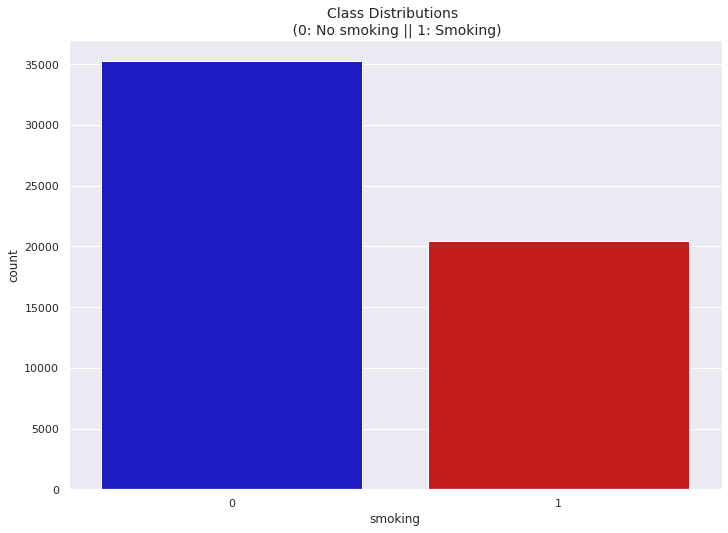

In [ ]:
colors = ["#0101DF", "#DF0101"]

sns.countplot(y, data=df1, palette=colors)
plt.title('Class Distributions \n (0: No smoking || 1: Smoking)', fontsize=14)

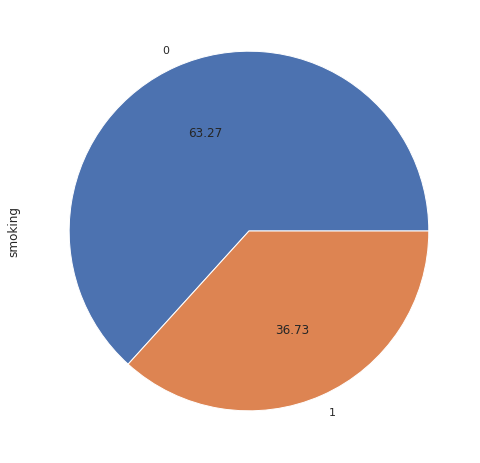

In [ ]:
# Check for imbalanced data
y.value_counts().plot.pie(autopct = "%.2f")

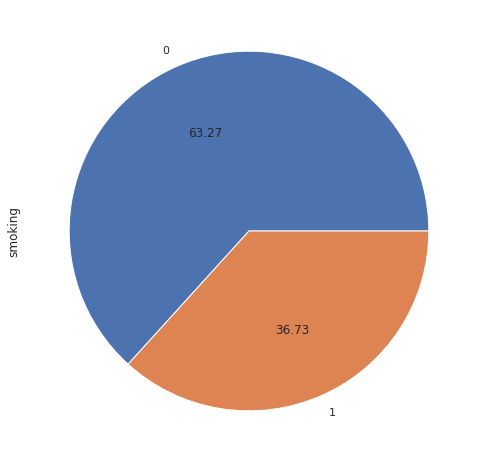

In [ ]:
# Check for imbalanced data - y train
y_train.value_counts().plot.pie(autopct = "%.2f")

**5.3 Random Under-Sampling:**

In this phase of the project we will implement "**Random Under Sampling**" which basically consists of removing data in order to have a more balanced dataset and thus avoiding our models to overfitting. After implementing this technique, we have a sub-sample of our dataframe with a 50/50 ratio with regards to our classes. Then the next step we will implement is to shuffle the data to see if our models can maintain a certain accuracy everytime we run this script.

Note: The main issue with "Random Under-Sampling" is that we run the risk that our classification models will not perform as accurate as we would like to since there is a great deal of information loss (bringing 14,318 non-smoking transaction from 35,237 non-smoking transaction)

In [ ]:
rus = RandomUnderSampler(sampling_strategy=1)
X_rus, y_rus = rus.fit_resample(X_train, y_train)

**5.4 Equally Distributing and Correlating:**

Now that we have our dataframe correctly balanced, we can go further with our analysis and data preprocessing.

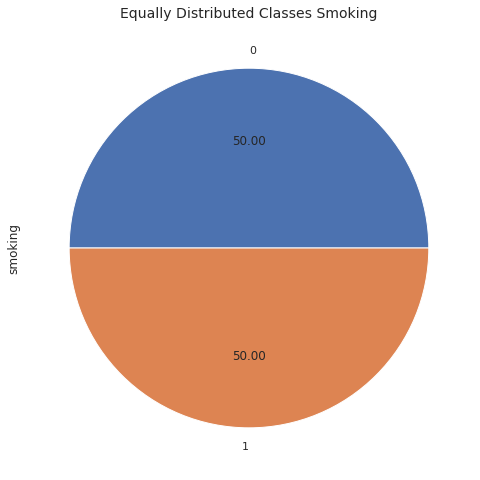

In [ ]:
plt.title('Equally Distributed Classes Smoking', fontsize=14)
y_rus.value_counts().plot.pie(autopct = "%.2f")

**5.5 Machine Learning Classification Algorithms:**
*   Neural Network
*   Ensemble Methods
*   Generalized Linear Models (GLM)
*   Decision Trees
*   xgboost
5.5.1 Non-under sampling data


In [ ]:
#Machine Learning Algorithm (MLA) Selection and Initialization
algorithms = [
    #Neural Network
    MLPClassifier,

    # Ensemble Methods
    ExtraTreesClassifier,
    RandomForestClassifier,
    
    # GLM
    LogisticRegression,

    # Trees    
    DecisionTreeClassifier,
    ExtraTreeClassifier,

    # xgboost: http://xgboost.readthedocs.io/en/latest/model.html
    XGBClassifier   
    ]

In [ ]:
def CompareAlgorithms(df,                                 
                      Y,
                      X_test,
                      y_test,
                      x_train,
                      y_train,
                      algorithm,
                      iteration_round = 3):
    
    scores = {"Algorithm":algorithm.__name__}
    
    """ Dependent & Independent Variables"""
    y = df1[Y]
    X = df1.drop([Y],axis=1)
        
    """ Create Model """
    str_run = datetime.datetime.now()
    model = algorithm(random_state=5).fit(x_train,y_train)
    process_time = datetime.datetime.now()-str_run
    
    """ Prediction """
    y_pred = model.predict(X_test)
    
    """ Scores """
    scores["accuracy_score"] = cross_val_score(model, x_train, y_train, scoring="accuracy", cv = iteration_round).mean()*100
    scores["accuracy_std"] = cross_val_score(model, x_train, y_train, scoring="accuracy", cv = iteration_round).std()*100
    
    scores["precision_score"] = cross_val_score(model, x_train, y_train, scoring="precision", cv = iteration_round).mean()*100
    scores["precision_std"] = cross_val_score(model, x_train, y_train, scoring="precision", cv = iteration_round).std()*100

    scores["recall_score"] = cross_val_score(model, x_train, y_train, scoring="recall", cv = iteration_round).mean()*100
    scores["recall_std"] = cross_val_score(model, x_train, y_train, scoring="recall", cv = iteration_round).std()*100

    scores["f1_score"] = cross_val_score(model, x_train, y_train, scoring="f1", cv = iteration_round).mean()*100
    scores["f1_std"] = cross_val_score(model, x_train, y_train, scoring="f1", cv = iteration_round).std()*100
        
    scores["roc_auc_score"] = cross_val_score(model, x_train, y_train, scoring="roc_auc", cv = iteration_round).mean()*100
    scores["roc_auc_std"] = cross_val_score(model, x_train, y_train, scoring="roc_auc", cv = iteration_round).std()*100
    
    scores["process_time(s)"] = process_time.total_seconds()    
    
    """ Confusion Matrix """
    cm = confusion_matrix(y_test,y_pred)
    print(f"""=== {algorithm.__name__} Confusion Matrix ===\n {cm} \n""")
    
    
    """ Classification Report """
    print(f"""=== {algorithm.__name__} Classification Report ===\n\n""")
    print(classification_report(y_test, y_pred))
                
    """
    return scores (type: dict)
    """
    return scores

In [ ]:
scoresDF = pd.DataFrame()

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    for algorithm in algorithms:
            score=CompareAlgorithms(df1,
                                    "smoking",
                                    X_test=X_test,
                                    y_test=y_test,
                                    x_train=X_train,
                                    y_train=y_train,
                                    algorithm=algorithm,
                                    iteration_round=3)

            scoresDF = scoresDF.append(score, ignore_index=True)

=== MLPClassifier Confusion Matrix ===
 [[8817 1754]
 [2507 3630]] 

=== MLPClassifier Classification Report ===


              precision    recall  f1-score   support

           0       0.78      0.83      0.81     10571
           1       0.67      0.59      0.63      6137

    accuracy                           0.74     16708
   macro avg       0.73      0.71      0.72     16708
weighted avg       0.74      0.74      0.74     16708

=== ExtraTreesClassifier Confusion Matrix ===
 [[8880 1691]
 [1358 4779]] 

=== ExtraTreesClassifier Classification Report ===


              precision    recall  f1-score   support

           0       0.87      0.84      0.85     10571
           1       0.74      0.78      0.76      6137

    accuracy                           0.82     16708
   macro avg       0.80      0.81      0.81     16708
weighted avg       0.82      0.82      0.82     16708

=== RandomForestClassifier Confusion Matrix ===
 [[8988 1583]
 [1394 4743]] 

=== RandomForestClassifi

In [ ]:
scoresDF.sort_values(by="accuracy_score",ascending = False,inplace=True)
scoresDF

,Algorithm,accuracy_score,accuracy_std,precision_score,precision_std,recall_score,recall_std,f1_score,f1_std,roc_auc_score,roc_auc_std,process_time(s)
2,RandomForestClassifier,80.091833,0.220145,72.109266,0.302479,74.682191,0.441520,73.372585,0.311380,88.669698,0.032952,9.389788
1,ExtraTreesClassifier,79.496721,0.281679,70.808764,0.101751,75.157188,1.045205,72.915357,0.547799,88.805194,0.088194,5.618939
6,XGBClassifier,76.308233,0.125813,66.273176,0.223470,72.279629,0.477964,69.144932,0.198912,84.679106,0.111073,3.076155
4,DecisionTreeClassifier,74.525437,0.282580,65.409092,0.251709,65.022972,0.831564,65.214154,0.543734,72.532162,0.397991,0.624988
5,ExtraTreeClassifier,73.820015,0.414498,64.454684,0.663269,64.045237,0.242599,64.248610,0.450686,71.769639,0.378189,0.054250
0,MLPClassifier,73.581492,2.009316,60.803442,3.490358,82.546277,8.294338,69.604784,0.556596,83.295328,0.265318,10.078977
3,LogisticRegression,71.447254,0.194712,63.208635,0.200300,53.254581,0.795698,57.803697,0.522237,79.102176,0.122164,0.795876


5.5.2 Under sampling data

In [ ]:
scoresDFUnderSampling = pd.DataFrame()

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    for algorithm in algorithms:
            score=CompareAlgorithms(df1,
                                    "smoking",
                                    X_test=X_test,
                                    y_test=y_test,
                                    x_train=X_rus,
                                    y_train=y_rus,
                                    algorithm=algorithm,
                                    iteration_round=3)

            scoresDFUnderSampling = scoresDFUnderSampling.append(score, ignore_index=True)

=== MLPClassifier Confusion Matrix ===
 [[8287 2284]
 [1839 4298]] 

=== MLPClassifier Classification Report ===


              precision    recall  f1-score   support

           0       0.82      0.78      0.80     10571
           1       0.65      0.70      0.68      6137

    accuracy                           0.75     16708
   macro avg       0.74      0.74      0.74     16708
weighted avg       0.76      0.75      0.75     16708

=== ExtraTreesClassifier Confusion Matrix ===
 [[7491 3080]
 [ 577 5560]] 

=== ExtraTreesClassifier Classification Report ===


              precision    recall  f1-score   support

           0       0.93      0.71      0.80     10571
           1       0.64      0.91      0.75      6137

    accuracy                           0.78     16708
   macro avg       0.79      0.81      0.78     16708
weighted avg       0.82      0.78      0.78     16708

=== RandomForestClassifier Confusion Matrix ===
 [[7573 2998]
 [ 627 5510]] 

=== RandomForestClassifi

In [ ]:
scoresDFUnderSampling.sort_values(by="accuracy_score",ascending = False,inplace=True)
scoresDFUnderSampling

,Algorithm,accuracy_score,accuracy_std,precision_score,precision_std,recall_score,recall_std,f1_score,f1_std,roc_auc_score,roc_auc_std,process_time(s)
2,RandomForestClassifier,79.501327,0.513327,74.514844,0.396951,89.670295,0.591293,81.393059,0.480381,87.504784,0.098416,6.383313
1,ExtraTreesClassifier,79.455940,0.451931,74.031089,0.423034,90.745918,0.446442,81.540279,0.393639,87.603298,0.168978,3.609262
6,XGBClassifier,77.475906,0.195793,71.980641,0.199397,89.977657,0.305967,79.978844,0.173206,84.799570,0.057879,2.220805
0,MLPClassifier,75.021016,1.296051,73.698650,2.562232,78.691856,9.400819,75.652486,3.257270,83.070780,0.095678,8.707050
4,DecisionTreeClassifier,72.677747,0.475342,72.577604,0.486969,72.901298,0.550749,72.738506,0.476956,72.677748,0.475378,0.457294
3,LogisticRegression,72.192351,0.122853,70.805942,0.132417,75.527345,0.666724,73.088465,0.255316,79.058217,0.155030,0.535719
5,ExtraTreeClassifier,72.132979,0.479036,72.095369,0.634658,72.230766,0.603570,72.160326,0.438925,72.133000,0.478994,0.039453


*   After applying Random Under-Sampling, there is a drastic decrease in the accuracy of the model. Accuracy is not the best metric to use when evaluating imbalanced datasets as it can be misleading instead use f1-score, precision/recall score or confusion matrix. After applying Random Under-Sampling we observe precision/recall of minority class increases.
*  We are very interested in the recall score, because that is the metric that will help us try to capture the most smoking transactions. If you think how Accuracy, Precision and Recall work for a confusion matrix, recall would be the most interesting:

  Accuracy = (TP+TN)/total <br>
  Precision = TP/(TP+FP) <br>
  Recall = TP/(TP+FN) <br>

*  As we know, due to the imbalacing of the data, many observations could be predicted as False Negatives, being, that we predict a normal transaction, but it is in fact a smoking one. Recall captures this.



#6. MLP

- 6.1 Network Architecture
- 6.2 Accuracy & Loss History
- 6.3 Result

In [ ]:
split_ratio = 0.3
train_x, test_x, train_y, test_y = train_test_split(df1[df1.columns[1:-1]], df1['smoking'], test_size=split_ratio)
X, Y = df1[df1.columns[1:-1]], df1['smoking']

**6.1 Network Architecture**

Layers:
>hidden 3 layers, normalization 2 layers

Activation Function:
>hidden => relu, output => softmax

Loss Function
>sparse_categorical_crossentropy

Optimizer
>Adam

Sizing:
>batch size = 32, output sizing = 2

Epochs:
>number of epochs = 150 (>150 overfit)

In [ ]:
batch_size = 32
#input
model = Sequential()
model.add(Input(shape=(len(X.columns))))
#hidden
model.add(Dense(32, activation='relu',name='hidden1'))
model.add(BatchNormalization(axis=-1,name='bn1'))
model.add(Dense(64, activation='relu',name='hidden2'))
model.add(BatchNormalization(axis=-1,name='bn2'))
model.add(Dense(32, activation='relu',name='hidden3'))
model.add(Dropout(0.1))
#output
model.add(Dense(len(Y.unique()), activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden1 (Dense)             (None, 32)                832       
                                                                 
 bn1 (BatchNormalization)    (None, 32)                128       
                                                                 
 hidden2 (Dense)             (None, 64)                2112      
                                                                 
 bn2 (BatchNormalization)    (None, 64)                256       
                                                                 
 hidden3 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 2)                

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'] )
checkpoint_filepath = "bestmodel_epoch{epoch:02d}_valloss{val_loss:.2f}.hdf5"
model_checkpoint_callback = ModelCheckpoint(filepath=checkpoint_filepath, save_weights_only=True, monitor='val_acc', mode='max', save_best_only=True)

In [ ]:
# epochs > 150 => overfit
str_run = datetime.datetime.now()
history = model.fit(X, Y, batch_size=batch_size, epochs=150, verbose=1, validation_split=split_ratio, callbacks=[model_checkpoint_callback])
process_time = (datetime.datetime.now()-str_run).total_seconds()

Epoch 1/150
1219/1219 [==============================] - 4s 3ms/step - loss: 0.5241 - acc: 0.7163 - val_loss: 0.4987 - val_acc: 0.7308
Epoch 2/150
1219/1219 [==============================] - 3s 3ms/step - loss: 0.4943 - acc: 0.7339 - val_loss: 0.5268 - val_acc: 0.7056
Epoch 3/150
1219/1219 [==============================] - 3s 3ms/step - loss: 0.4841 - acc: 0.7429 - val_loss: 0.5026 - val_acc: 0.7314
Epoch 4/150
1219/1219 [==============================] - 3s 3ms/step - loss: 0.4771 - acc: 0.7467 - val_loss: 0.4713 - val_acc: 0.7467
Epoch 5/150
1219/1219 [==============================] - 3s 3ms/step - loss: 0.4731 - acc: 0.7505 - val_loss: 0.4636 - val_acc: 0.7519
Epoch 6/150
1219/1219 [==============================] - 3s 3ms/step - loss: 0.4707 - acc: 0.7513 - val_loss: 0.4809 - val_acc: 0.7394
Epoch 7/150
1219/1219 [==============================] - 3s 3ms/step - loss: 0.4687 - acc: 0.7541 - val_loss: 0.4610 - val_acc: 0.7560
Epoch 8/150
1219/1219 [==============================] 

**6.2 Accuracy & Loss History**

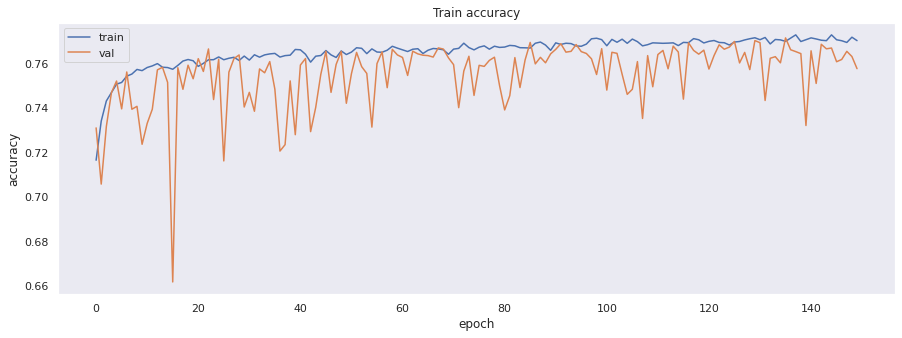

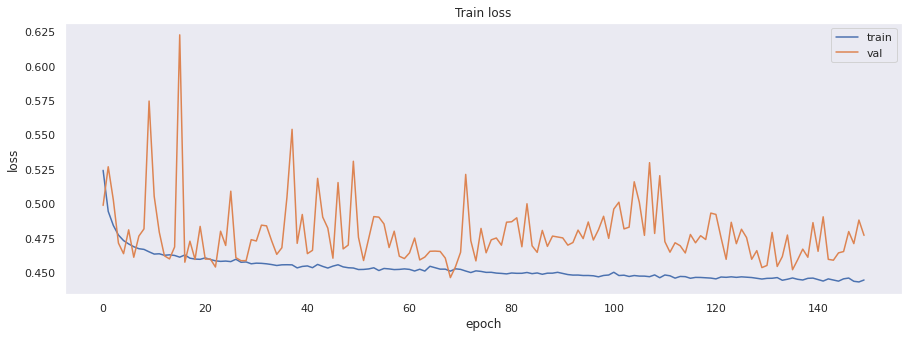

In [ ]:
# Summarize history for accuracy
plt.figure(figsize=(15,5))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Train accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.grid()
plt.show()

# Summarize history for loss
plt.figure(figsize=(15,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Train loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.grid()
plt.show()

**6.3 Result**

In [ ]:
print('MLP result')
print(f"Accuracy (mean ± sd):  {np.mean(history.history['acc'])*100:.1f} ± {np.std(history.history['acc'])*100:.1f} %")
print(f"loss     (mean ± sd):  {np.mean(history.history['loss'])*100:.1f} ± {np.std(history.history['loss'])*100:.1f} %")
print(f'processing time     :  {process_time:.2f} seconds\n')

MLP result
Accuracy (mean ± sd):  76.5 ± 0.7 %
loss     (mean ± sd):  45.3 ± 1.0 %
processing time     :  502.88 seconds



#7. Result


**7.1 Traditional ML and MLP comparision**

In [ ]:
scoresDF.sort_values(by="accuracy_score",ascending = False,inplace=True)
highest_model = 'Traditional ML' if scoresDF['accuracy_score'][0]>np.mean(history.history['acc'])*100 else 'MLP'
lowest_model = 'Traditional ML' if scoresDF["process_time(s)"][0]<process_time else 'MLP'

print('\nTraditional ML result')
display(scoresDF[['Algorithm','accuracy_score','accuracy_std','process_time(s)']])
print('\n\nMLP result')
display(pd.DataFrame({'Algorithm':'A multilayer perceptron (MLP)','accuracy_score':np.mean(history.history['acc'])*100,'accuracy_std':np.std(history.history['acc']),'process_time(s)':process_time},index=[0]))

def show_acc(acc,acc_std,ptime):
  print(f"    Accuracy (mean ± sd):  {acc:.2f} ± {acc_std:.2f} %")
  print(f'    processing time     :  {ptime:.2f} seconds')

print('\n\nthe highest accuracy score form ML model is:',scoresDF['Algorithm'][0])
show_acc(scoresDF['accuracy_score'][0],scoresDF['accuracy_std'][0],scoresDF["process_time(s)"][0])
print('and result from ML model is:')
show_acc(np.mean(history.history['acc'])*100,np.std(history.history['acc'])*100,process_time)

print('===================================================')
print(f'the highest accuracy models is "{highest_model}"')
print(f'the lowest processing time models is "{lowest_model}"')
print('the best model for this task is:',scoresDF['Algorithm'][0])


Traditional ML result


,Algorithm,accuracy_score,accuracy_std,process_time(s)
2,RandomForestClassifier,80.091833,0.220145,9.389788
1,ExtraTreesClassifier,79.496721,0.281679,5.618939
6,XGBClassifier,76.308233,0.125813,3.076155
4,DecisionTreeClassifier,74.525437,0.282580,0.624988
5,ExtraTreeClassifier,73.820015,0.414498,0.054250
0,MLPClassifier,73.581492,2.009316,10.078977
3,LogisticRegression,71.447254,0.194712,0.795876




MLP result


,Algorithm,accuracy_score,accuracy_std,process_time(s)
0,A multilayer perceptron (MLP),76.529106,0.006869,502.884729




the highest accuracy score form ML model is: MLPClassifier
    Accuracy (mean ± sd):  73.58 ± 2.01 %
    processing time     :  10.08 seconds
and result from ML model is:
    Accuracy (mean ± sd):  76.53 ± 0.69 %
    processing time     :  502.88 seconds
the highest accuracy models is "MLP"
the lowest processing time models is "Traditional ML"
the best model for this task is: MLPClassifier


**7.2 Features selection**

In [ ]:
best_model = dscore['classifier'][dscore['score']==np.max(dscore['score'])].item()
print('\naccuracy score comparision between data with "features selection" process and "no-features selection" process')
print(f"<{best_model}> use the best model")
print(f"\tdata with features selection process    : accuracy = {dscore['score'][dscore['classifier']==best_model].item()*100 :.2f} %")
print(f"\tdata with no features selection process : accuracy = {dscore2['score'][dscore2['classifier']==best_model].item()*100 :.2f} %")
highest_process = 'data with features selection process' if dscore['score'][dscore['classifier']==best_model].item()>dscore2['score'][dscore2['classifier']==best_model].item() else 'data with no features selection process'
lowest_process = 'data with features selection process' if dscore['score'][dscore['classifier']==best_model].item()<dscore2['score'][dscore2['classifier']==best_model].item() else 'data with no features selection process'
print('===================================================')
print(f'score of {highest_process} is higher than {lowest_process}')


accuracy score comparision between data with "features selection" process and "no-features selection" process
<RandomForestClassifier> use the best model
	data with features selection process    : accuracy = 81.95 %
	data with no features selection process : accuracy = 82.09 %
score of data with no features selection process is higher than data with features selection process


**7.3 Imbalanced data preparation**

In [ ]:
print('\naccuracy score comparision between data with "imbalanced data preparation" process and "no imbalanced data preparation" process')
print(f"<{best_model}> use the best model")
print(f"\tdata with imbalanced data preparation process    : accuracy = {scoresDFUnderSampling['accuracy_score'][scoresDFUnderSampling['Algorithm']==best_model].item():.2f} ± {scoresDFUnderSampling['accuracy_std'][scoresDFUnderSampling['Algorithm']==best_model].item():.2f} %")
print(f"\tdata with no imbalanced data preparation process : accuracy = {scoresDF['accuracy_score'][scoresDF['Algorithm']==best_model].item():.2f} ± {scoresDFUnderSampling['accuracy_std'][scoresDFUnderSampling['Algorithm']==best_model].item():.2f} %")
highest_process = 'data with imbalanced data preparation process' if scoresDFUnderSampling['accuracy_score'][scoresDFUnderSampling['Algorithm']==best_model].item()>scoresDF['accuracy_score'][scoresDF['Algorithm']==best_model].item() else 'data with no imbalanced data preparation process'
lowest_process = 'data with imbalanced data preparation process' if scoresDFUnderSampling['accuracy_score'][scoresDFUnderSampling['Algorithm']==best_model].item()<scoresDF['accuracy_score'][scoresDF['Algorithm']==best_model].item() else 'data with no imbalanced data preparation process'
print('===================================================')
print(f'score of {highest_process} is higher than {lowest_process}')


accuracy score comparision between data with "imbalanced data preparation" process and "no imbalanced data preparation" process
<RandomForestClassifier> use the best model
	data with imbalanced data preparation process    : accuracy = 79.50 ± 0.51 %
	data with no imbalanced data preparation process : accuracy = 80.09 ± 0.51 %
score of data with no imbalanced data preparation process is higher than data with imbalanced data preparation process


# 8. Discussion

**8.1 Comparison result between Traditional ML and MLP**

Our hypothesis before start this homework are
*   Tradition ML Classifier can predict whether subject is smoking or not more accuracy than MLP Classifier.
*   Traditiona ML will have less process time than MLP.


As a result in section 7.1, the table shows the most accurate traditional ML algorithm is RandomForestClassifier with 80.09 ± 0.22 % which is the most accurate model among Traditional ML and MLP which go along with our assumption. Secondly, the least processing time is ExtraTreeClassifier with 0.054250 seconds, and all of traditional ML has far less processing time than MLP which has 502.88 seconds to finish processing.

The reason behind the result might be because this dataset has only 55,692 records, which is considered too small to use MLP. and the other reason is traditional ML is suitable for classification in this case. Not only it has more accurate result, but also has less processing time. 


**8.2 Feature selection using feature importance** 

After cleaning data and doing exploratory data analysis, our group decided to finding that which features to choose for training model. Hence, feature importance is the method that we used for decision. 

Using feature importance by choosing 5 feature that has more influence to target variable, features that has feature importance score more than 0.3, somehow the result after model training on test dataset is not perform better than using all feature except ID column.


**8.3 Imbalanced data handling**

As you can see in section 5.2, The target variable between smoking and non-smoking is not balance. The non-smoking group is 63.27 % of overall record. So we used undersampling technique to handle with imbalance data. 
However, as you can see in section, after train model and test, the result of model that trained from total dataset is giving more accuracy score.


Another way to deal with imbalance data is using another accuracy measurement as Recall which is more suiter measurement in this case.


# 9. Conclusion

In this project, we have tried to determine the presence or absence of smoking through bio-signals. This study showed that Comparison of Traditional Machine Learning and ML , Feature selection using feature importance and Imbalanced data handling.
1. When we look at the Traditional ML result, the best Traditional ML is RandomForestClassifier (80% ± 0.2), 9.38 sec time  and ExtraTreesClassifier (79% ± 0.2), 5.6 sec but time of  ExtraTreesClassifier is better than RandomForestClassifier.
2.  The best of Traditional ML is RandomForestClassifier MLP (80% ± 0.2), 9.38 sec time but ML is 76% ± 0.006 502.8 sec. 
3. Accuracy of data with no feature is better than with features selection process.
4. Data show different method of dealing with unbalanced dataset like smoking and non-smoking. Use undersampling technique method to handle. The response variable can lead to similar. The best score of 79.50 ± 0.51 % (imbalanced data preparation process) and 80.09 ± 0.51 % (no imbalanced data preparation process)